In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
df= pd.read_csv(R"D:\instacart\data_files\clustering_data_size_reduced.csv")
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_time,product_name,aisle,department,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,4,41317,117,3,1,0
1,2539329,1,1,2,8,NaN,4,32735,103,20,3,0
2,2539329,1,1,2,8,NaN,4,32263,119,7,2,0
3,2539329,1,1,2,8,NaN,4,1564,103,20,4,0
4,2539329,1,1,2,8,NaN,4,49200,99,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,13,1,12,7.0,0,38389,88,20,9,0
32434485,2977660,206209,13,1,12,7.0,0,3676,50,19,1,1
32434486,2977660,206209,13,1,12,7.0,0,19882,42,20,7,0
32434487,2977660,206209,13,1,12,7.0,0,5736,42,20,6,0


In [3]:
df = df.dropna(subset=['user_id', 'aisle'])

In [12]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [36]:
df_sample = df.sample(frac=0.8, random_state=42)

In [45]:
try:
    basket = df.groupby(['user_id', 'aisle']).size().unstack(fill_value=0)
    basket = basket.map(lambda x: 1 if x > 0 else 0)
except IndexError as e:
    print(f"IndexError: {e}")

In [46]:
frequent_itemsets = apriori(basket, min_support=0.3, use_colnames=True, low_memory=True)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [48]:
sorted_rules = rules.sort_values(by='confidence', ascending=False)

In [49]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1559,"(50, 51, 98)",(53),0.340058,0.772095,0.336401,0.989247,1.281250,0.073844,21.195439,0.332624
936,"(98, 51)",(53),0.347579,0.772095,0.343137,0.987220,1.278624,0.074773,17.832796,0.334002
2214,"(98, 53, 133, 62)",(50),0.320199,0.859036,0.315471,0.985234,1.146906,0.040408,9.546212,0.188421
642,"(50, 51)",(53),0.360741,0.772095,0.355324,0.984984,1.275729,0.076798,15.177596,0.338101
2093,"(53, 98, 11, 133)",(50),0.315660,0.859036,0.310374,0.983254,1.144602,0.039211,8.417995,0.184607
...,...,...,...,...,...,...,...,...,...,...
777,(50),"(98, 70)",0.859036,0.315379,0.301839,0.351370,1.114119,0.030917,1.055487,0.726639
1513,(50),"(41, 53, 133)",0.859036,0.308978,0.301815,0.351342,1.137110,0.036392,1.065310,0.855378
796,(50),"(80, 93)",0.859036,0.317716,0.301432,0.350896,1.104430,0.028502,1.051115,0.670779
1876,(50),"(53, 133, 119)",0.859036,0.307314,0.301335,0.350783,1.141446,0.037341,1.066955,0.879077


In [50]:
aisle_name = pd.read_csv(R"D:\instacart\data_files\aisles.csv")
aisle_name

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [51]:
aisle_name.drop('aisle_id', axis=1, inplace=True)
aisle_name['aisle_id'] = aisle_name.index

In [52]:
sorted_rules['antecedents']=sorted_rules['antecedents'].map(lambda x: list(aisle_name[aisle_name['aisle_id'].isin(x)]['aisle'].values))
sorted_rules['consequents']=sorted_rules['consequents'].map(lambda x: list(aisle_name[aisle_name['aisle_id'].isin(x)]['aisle'].values))

In [53]:
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1559,"[preserved dips spreads, frozen breakfast, can...",[paper goods],0.340058,0.772095,0.336401,0.989247,1.281250,0.073844,21.195439,0.332624
936,"[frozen breakfast, canned fruit applesauce]",[paper goods],0.347579,0.772095,0.343137,0.987220,1.278624,0.074773,17.832796,0.334002
2214,"[paper goods, grains rice dried goods, canned ...",[preserved dips spreads],0.320199,0.859036,0.315471,0.985234,1.146906,0.040408,9.546212,0.188421
642,"[preserved dips spreads, frozen breakfast]",[paper goods],0.360741,0.772095,0.355324,0.984984,1.275729,0.076798,15.177596,0.338101
2093,"[fresh pasta, paper goods, canned fruit apples...",[preserved dips spreads],0.315660,0.859036,0.310374,0.983254,1.144602,0.039211,8.417995,0.184607
...,...,...,...,...,...,...,...,...,...,...
777,[preserved dips spreads],"[refrigerated pudding desserts, canned fruit a...",0.859036,0.315379,0.301839,0.351370,1.114119,0.030917,1.055487,0.726639
1513,[preserved dips spreads],"[frozen vegan vegetarian, paper goods, special...",0.859036,0.308978,0.301815,0.351342,1.137110,0.036392,1.065310,0.855378
796,[preserved dips spreads],"[canned jarred vegetables, tea]",0.859036,0.317716,0.301432,0.350896,1.104430,0.028502,1.051115,0.670779
1876,[preserved dips spreads],"[paper goods, yogurt, specialty wines champagnes]",0.859036,0.307314,0.301335,0.350783,1.141446,0.037341,1.066955,0.879077


In [54]:
sorted_rules[(sorted_rules['confidence'] > 0.8) & (sorted_rules['confidence'] < 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
918,"[preserved dips spreads, specialty wines champ...",[canned fruit applesauce],0.565645,0.773089,0.508969,0.899804,1.163906,0.071675,2.264659,0.324214
2015,"[grains rice dried goods, specialty wines cham...","[paper goods, canned fruit applesauce]",0.355945,0.677730,0.320199,0.899576,1.327338,0.078965,3.209104,0.382905
1159,"[packaged meat, paper goods]","[preserved dips spreads, canned fruit applesauce]",0.370978,0.723858,0.333666,0.899424,1.242542,0.065131,2.745594,0.310320
168,[canned jarred vegetables],[paper goods],0.378402,0.772095,0.340325,0.899372,1.164846,0.048162,2.264825,0.227667
1425,"[refrigerated, paper goods]","[preserved dips spreads, canned fruit applesauce]",0.348414,0.723858,0.313153,0.898797,1.241677,0.060951,2.728608,0.298713
...,...,...,...,...,...,...,...,...,...,...
352,[fresh pasta],"[paper goods, canned fruit applesauce]",0.502233,0.677730,0.403009,0.802433,1.184002,0.062630,1.631196,0.312208
594,"[frozen vegan vegetarian, paper goods]",[tea],0.408149,0.644846,0.327304,0.801922,1.243588,0.064111,1.793006,0.330953
1079,[specialty wines champagnes],"[paper goods, canned fruit applesauce]",0.603237,0.677730,0.483626,0.801717,1.182945,0.074794,1.625305,0.389785
1141,"[canned fruit applesauce, specialty wines cham...",[tea],0.527479,0.644846,0.422799,0.801546,1.243005,0.082656,1.789608,0.413734


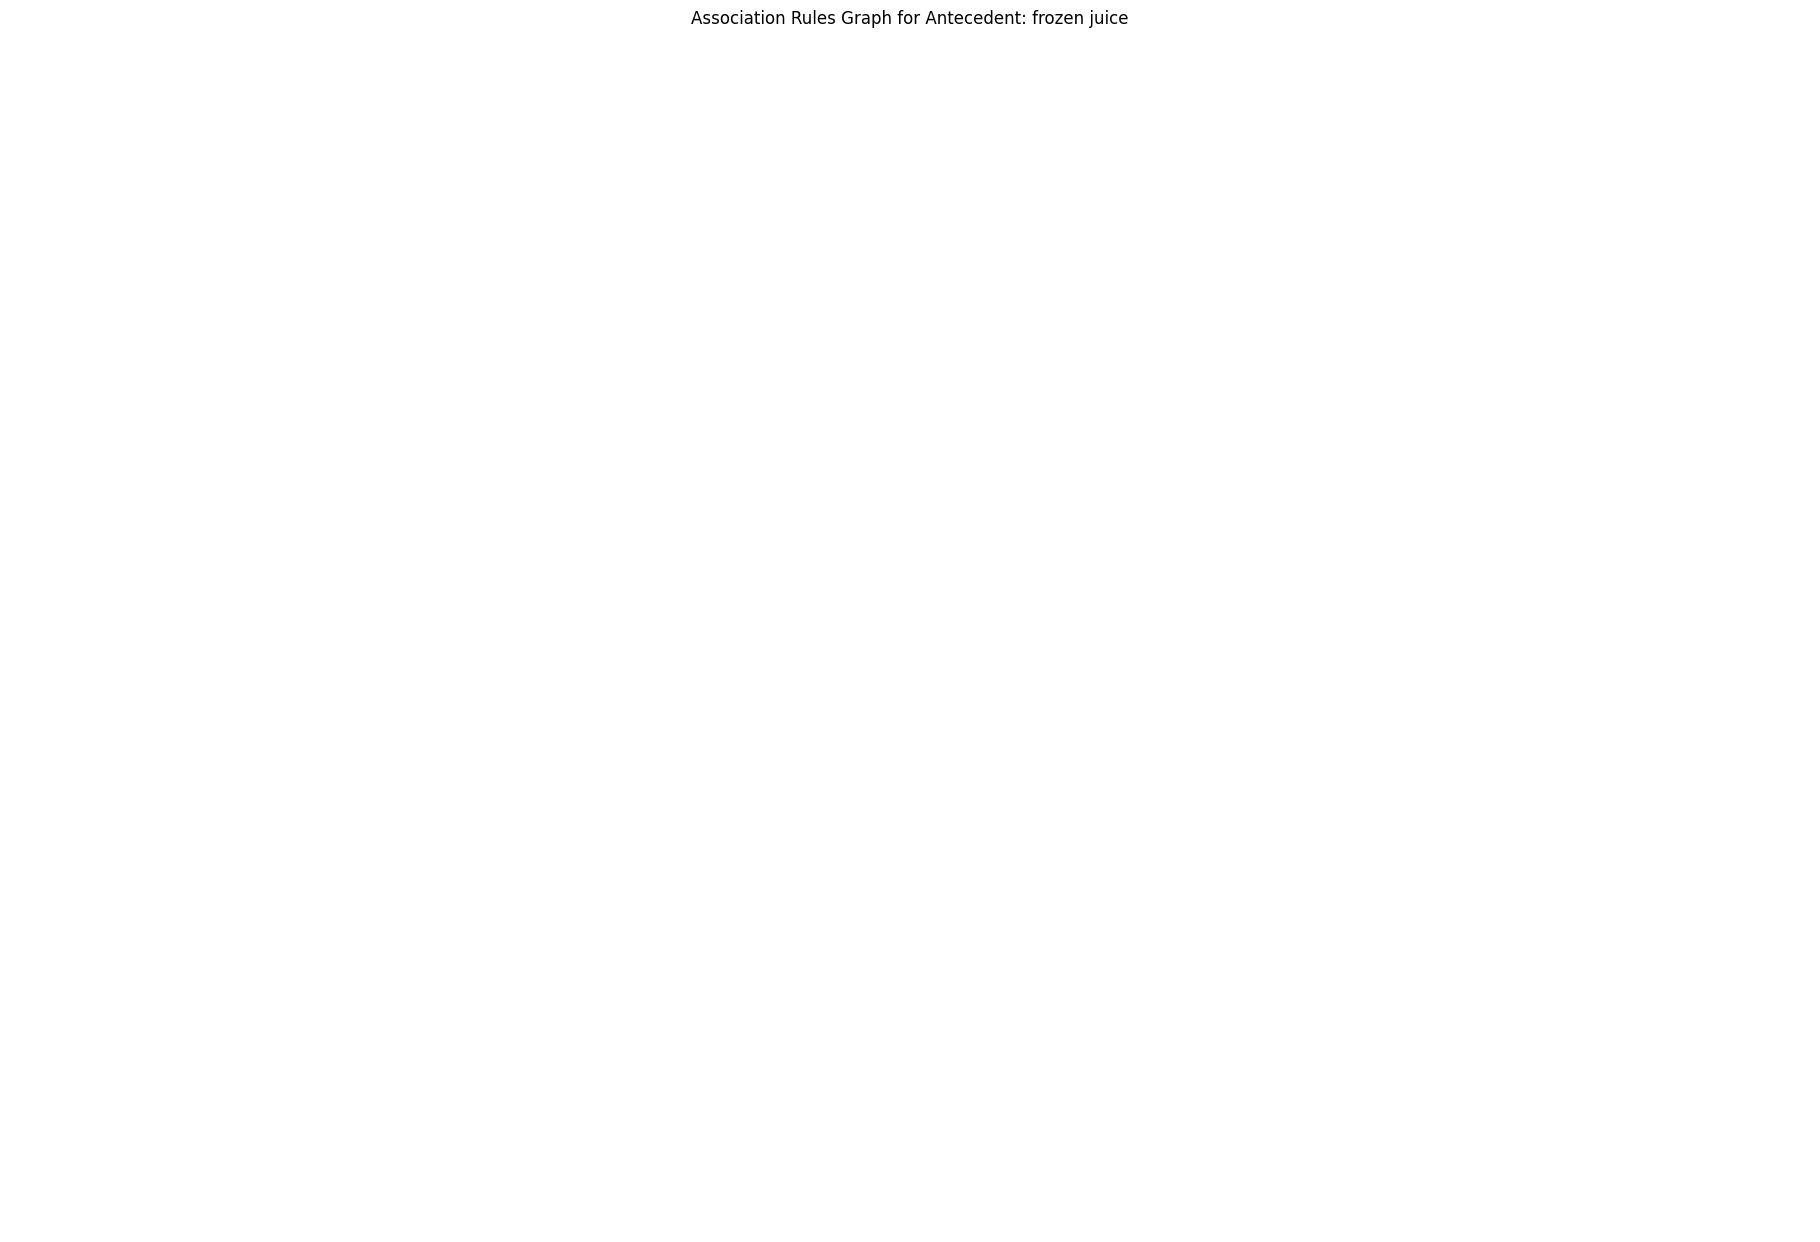

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'rules' is the DataFrame containing the association rules
# Specify the antecedent you are interested in
particular_antecedent = 'frozen juice'  # Replace 'milk' with the antecedent of your choice

# Step 1: Filter the rules based on the particular antecedent and confidence threshold
filtered_rules = sorted_rules[(sorted_rules['confidence'] > 0.1)]
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: particular_antecedent in x)]

# Step 2: Create a directed graph
G = nx.DiGraph()

# Step 3: Add nodes and edges
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_node(antecedent, color='yellow')
            G.add_node(consequent, color='red')
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Step 4: Visualize the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges(data=True)
colors = [G.nodes[node]['color'] for node in G.nodes()]
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, node_size=3000, font_size=10, font_color='black')
plt.title(f'Association Rules Graph for Antecedent: {particular_antecedent}')
plt.show()

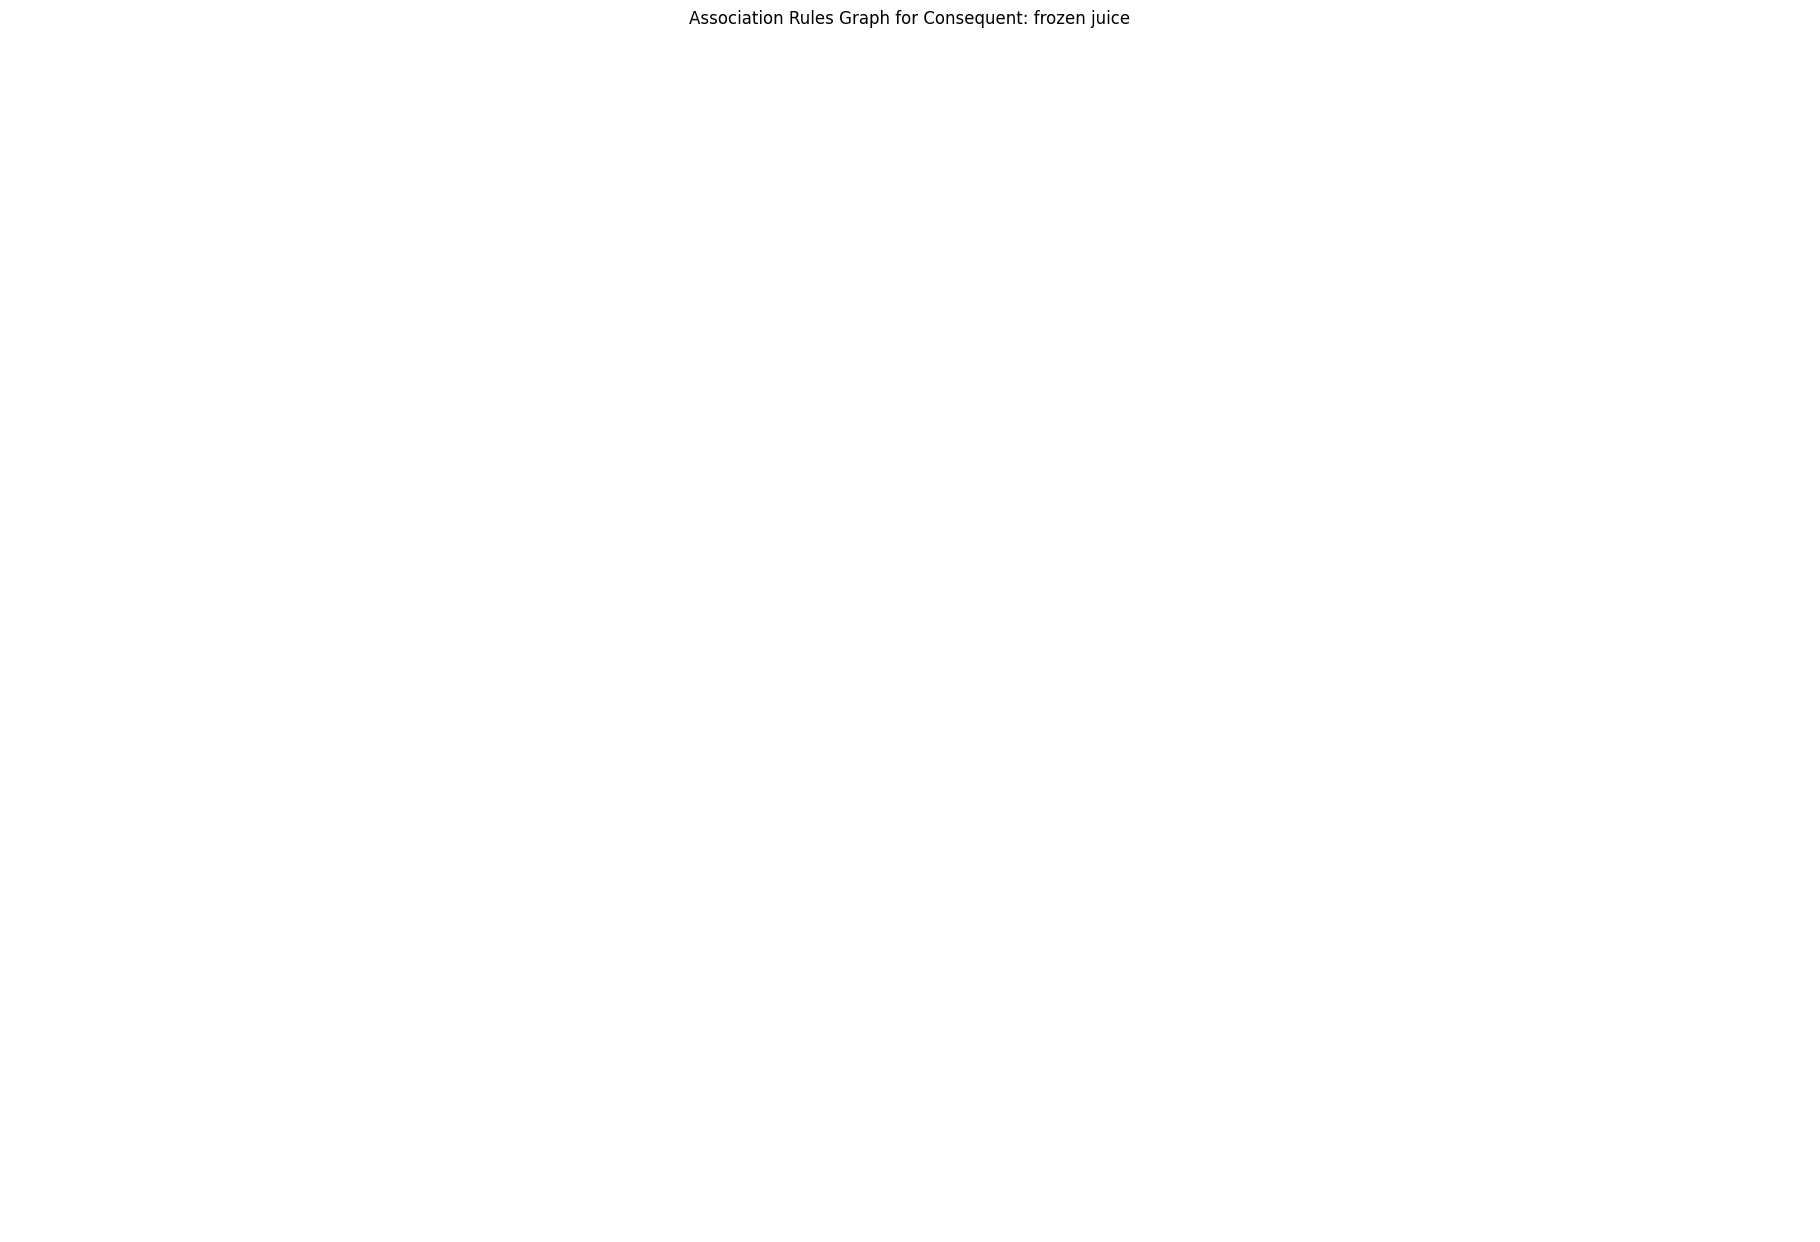

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'rules' is the DataFrame containing the association rules
# Specify the consequent you are interested in
particular_consequent = 'frozen juice'  # Replace with the consequent of your choice

# Step 1: Filter the rules based on the particular consequent and confidence threshold
filtered_rules = sorted_rules[(sorted_rules['confidence']>0.1)]
filtered_rules = filtered_rules[filtered_rules['consequents'].apply(lambda x: particular_consequent in x)]

# Step 2: Create a directed graph
G = nx.DiGraph()

# Step 3: Add nodes and edges
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_node(antecedent, color='yellow')
            G.add_node(consequent, color='red')
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Step 4: Visualize the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)
edges = G.edges(data=True)
colors = [G.nodes[node]['color'] for node in G.nodes()]
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, node_size=3000, font_size=10, font_color='black')
plt.title(f'Association Rules Graph for Consequent: {particular_consequent}')
plt.show()

beauty has a high association with (plates bowls cups flatware, condiments, kosher foods, fresh pasta, grains rice dried goods). As all of these are kitchen products there is a high possibility that women might be shopping for these items so to increase revenue it makes sense to recommend beauty products while showing kitchen items.

In [88]:
aisle_name['aisle'].sample(10)

119                          yogurt
21                        hair care
83                             milk
64        protein meal replacements
112                    frozen juice
131                          beauty
17     bulk dried fruits vegetables
79                       deodorants
123                         spirits
48                 packaged poultry
Name: aisle, dtype: object